In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz

In [2]:
# reading the data
df = pd.read_csv("Credit card.csv")

In [3]:
# displaying the top rows
df.head()

,Gender,Age,Monthly Income,Credit Score,Creditcard
0,M,18,600.0,NaN,N
1,M,21,5000.0,720.0,Y
2,M,22,4000.0,725.0,Y
3,M,45,8000.0,700.0,N
4,M,68,2000.0,800.0,Y


In [4]:
# checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          30 non-null     object 
 1   Age             30 non-null     int64  
 2   Monthly Income  26 non-null     float64
 3   Credit Score    25 non-null     float64
 4   Creditcard      30 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.3+ KB


In [5]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and transform the 'Gender' column
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [6]:
# changing categorical variables to proper datatypes
df['Gender'] = df['Gender'].astype('category')
df['Creditcard'] = df['Creditcard'].astype('category')

In [7]:
# checking null values
df.isnull().sum()

Gender            0
Age               0
Monthly Income    4
Credit Score      5
Creditcard        0
dtype: int64

In [8]:
# filling the null values
df['Monthly Income'] = df['Monthly Income'].fillna(0)
df['Credit Score'] = df['Credit Score'].fillna(0)

In [9]:
# checking the null values
df.isnull().sum()

Gender            0
Age               0
Monthly Income    0
Credit Score      0
Creditcard        0
dtype: int64

In [10]:
# initializing the model
model = RandomForestClassifier(n_estimators=100,criterion = 'entropy',random_state=1234)

In [11]:
# splitting the data into training and testing set
X = df.drop(columns=['Creditcard']) 
y = df['Creditcard']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

In [12]:
# fitting the model
model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1234)

In [13]:
# computing the confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[5 0]
 [0 4]]


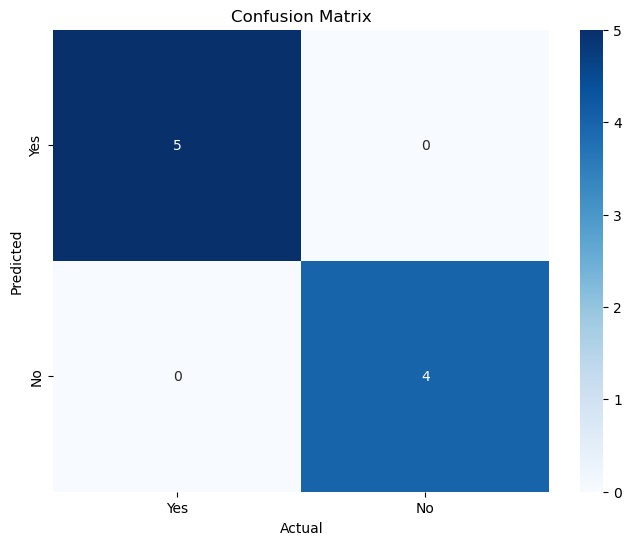

In [14]:
# plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=['Yes','No'], yticklabels=['Yes','No'])
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [26]:
# plotting one of the tree
tree_graph = tree.export_graphviz(model.estimators_[0], out_file=None,
                                  feature_names=X_train.columns,
                                  filled=True,
                                  rounded=True,
                                  special_characters=True)

graph = graphviz.Source(tree_graph)
graph.render("Tree")

'Tree.pdf'

In [16]:
# displaying the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           N       1.00      1.00      1.00         5
           Y       1.00      1.00      1.00         4

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



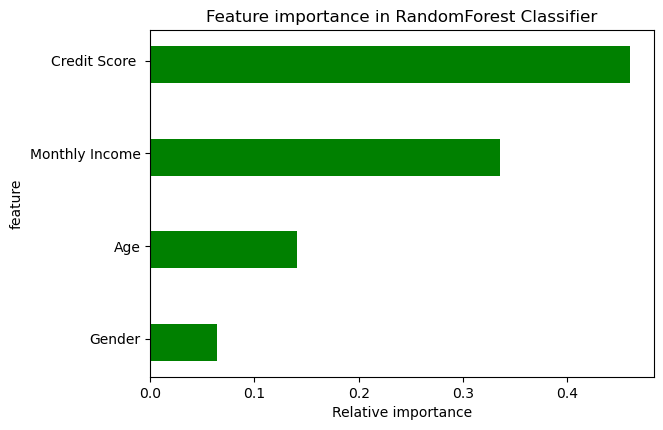

<Figure size 500x500 with 0 Axes>

In [17]:
# displaying the feature importance
col = ['Gender' ,'Age' ,'Monthly Income' ,'Credit Score ']
y = model.feature_importances_
fig, ax = plt.subplots() 
width = 0.4  
ind = np.arange(len(y))
ax.barh(ind, y, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)